In [2]:
import sys
sys.path.append("..")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from functions.estimators import MonteCarlo

### Creation of SABR Parameters and Parameter Perturbations

In [ ]:
strike_vector = np.arange(0.05 - 0.03, 0.05 + 0.03, 0.00125)
forward_price = 0.05

# Base row
row1 = {"beta": 0.5, "rho": -0.5, "alpha": 0.05, "T": 1.0, "nu": 1.0}

# Create modified rows
row2 = row1.copy()
row2["alpha"] += 0.05

row3 = row1.copy()
row3["nu"] += 1.0

row4 = row1.copy()
row4["rho"] += 1.0

df = pd.DataFrame([row1, row2, row3, row4])
df

,beta,rho,alpha,T,nu
0,0.5,-0.5,0.05,1.0,1.0
1,0.5,-0.5,0.10,1.0,1.0
2,0.5,-0.5,0.05,1.0,2.0
3,0.5,0.5,0.05,1.0,1.0


### Monte Carlo Simulations

In [ ]:
mc = MonteCarlo()
# Generate Simulated Dataset
def generate_simulated_dataset(dataset):
    dataset_new = []
    for i in range(dataset.shape[0]):
        F0 = forward_price
        T = dataset.iloc[i]['T']
        alpha = dataset.iloc[i]['alpha']
        beta = dataset.iloc[i]['beta']
        rho = dataset.iloc[i]['rho']
        nu = dataset.iloc[i]['nu']

        _, call_ivs = mc.calc_price_and_iv(alpha=alpha, beta=beta, rho=rho, nu=nu, K_vector=strike_vector, F0=F0, T=T, no_of_sim=10000, no_of_steps=100)

        # Concatenate parameters and implied volatilities
        data_point = [alpha, beta, rho, nu, T, F0] + call_ivs.tolist()
        dataset_new.append(data_point)

    columns = ['alpha', 'beta', 'rho', 'nu', 'T', 'F0'] + [f'IV_{k}' for k in strike_vector]
    df = pd.DataFrame(dataset_new, columns=columns)
    return df

In [ ]:
iv_df = generate_simulated_dataset(df)

### Implied Volatility Curves Plot

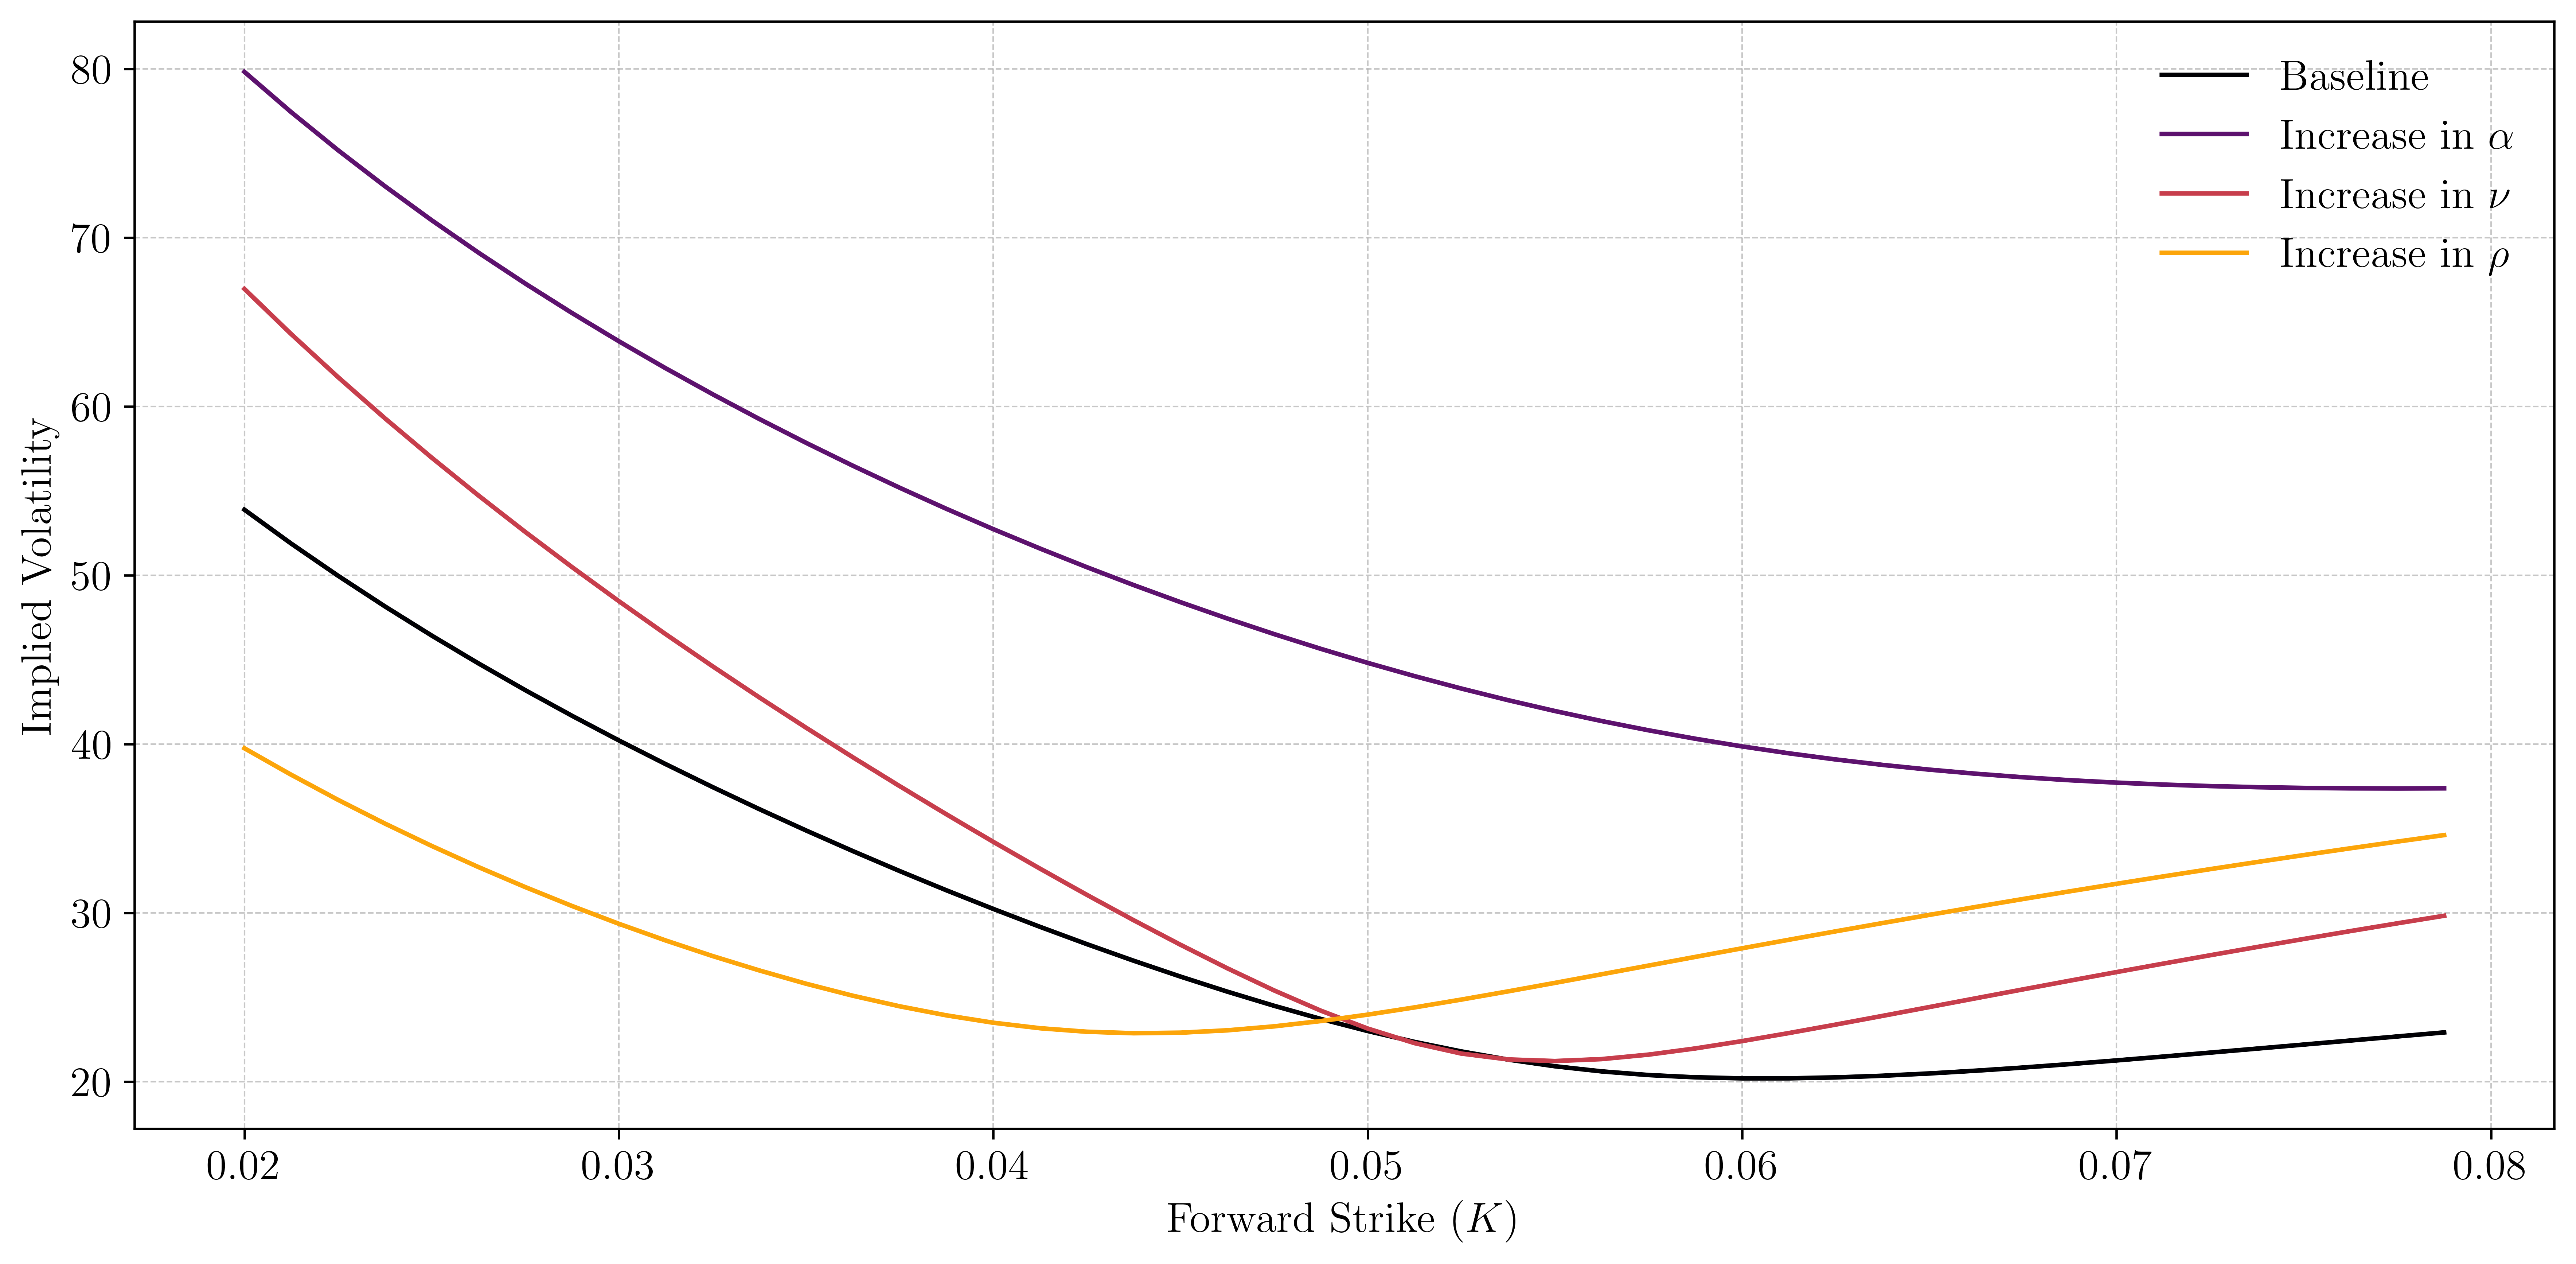

In [ ]:
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Latin Modern Roman'],
    'font.size': 14,
    'axes.titlesize': 14,
    'axes.labelsize': 14,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 14,
    'text.usetex': True, 
})

iv_columns = [col for col in iv_df.columns if col.startswith('IV_')]
strikes = [float(col.replace('IV_', '')) for col in iv_columns]

base_cmap = plt.cm.inferno
truncated_cmap = base_cmap(np.linspace(0, 0.8, 4))

plt.figure(figsize=(12, 6), dpi=600)

plt.plot(strikes, iv_df.iloc[0][iv_columns], label=r'Baseline', color=truncated_cmap[0])
plt.plot(strikes, iv_df.iloc[1][iv_columns], label=r'Increase in $\alpha$', color=truncated_cmap[1])
plt.plot(strikes, iv_df.iloc[2][iv_columns], label=r'Increase in $\nu$', color=truncated_cmap[2])
plt.plot(strikes, iv_df.iloc[3][iv_columns], label=r'Increase in $\rho$', color=truncated_cmap[3])

plt.xlabel(r'Forward Strike ($K$)')
plt.ylabel(r'Implied Volatility')

plt.legend(frameon=False)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()